# About Dataset

Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings.

The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like telecasting, e-mails, recommendations on net banking, mobile banking, etc.

In this case, the Happy Customer Bank wants to cross-sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.

# Problem Statement

Now, the bank is looking for your help in identifying customers that could show higher intent towards a recommended credit card, given:

# Import Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
train=pd.read_csv('train data credit card.csv')
test=pd.read_csv('test data credit card.csv')

In [6]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [7]:
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


# Basic Information

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [9]:
train.shape
print('Rows:-',train.shape[0])
print('Columns:-',train.shape[1])

Rows:- 245725
Columns:- 11


# Handling Missing Values

In [10]:
train.isnull().sum()/len(train)*100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.934073
Avg_Account_Balance     0.000000
Is_Active               0.000000
Is_Lead                 0.000000
dtype: float64

**We will drop the Columns 'ID' as there is no use in both train and test dataset**

In [11]:
train.drop(['ID'],axis=1,inplace=True)
test.drop(['ID'],axis=1,inplace=True)

**As Credit Product has 11.93% missing values,we will not fill through mean or mode option as that will impact in model accuracy,so we will be imputed with 'No_Information'**

In [12]:
train['Credit_Product']=train['Credit_Product'].fillna('No_Info')
test['Credit_Product']=test['Credit_Product'].fillna('No_Info')

In [13]:
train['Credit_Product'].value_counts()

No         144357
Yes         72043
No_Info     29325
Name: Credit_Product, dtype: int64

In [14]:
train.isnull().sum()/len(train)*100

Gender                 0.0
Age                    0.0
Region_Code            0.0
Occupation             0.0
Channel_Code           0.0
Vintage                0.0
Credit_Product         0.0
Avg_Account_Balance    0.0
Is_Active              0.0
Is_Lead                0.0
dtype: float64

# Statistical Information

In [15]:
train.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


# Exploratory Data Analysis

**Checking Target variable frequency**

In [16]:
train['Is_Lead'].value_counts(normalize=True)*100

0    76.279174
1    23.720826
Name: Is_Lead, dtype: float64

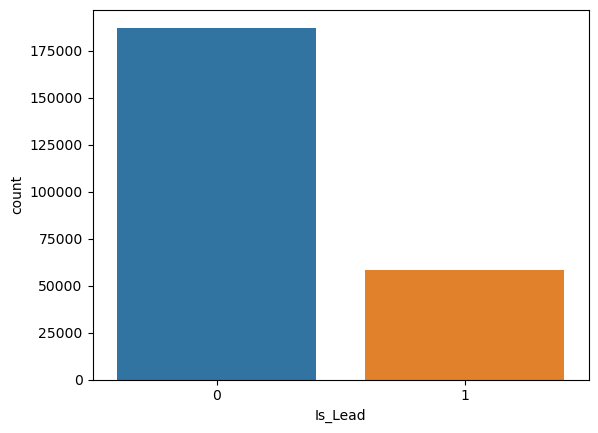

In [17]:
sns.countplot(train['Is_Lead'])
plt.show()

**As Target variable is highly imbalanced data**

**76.27% is defined as No Lead**  

**23.72% is defined as Lead**

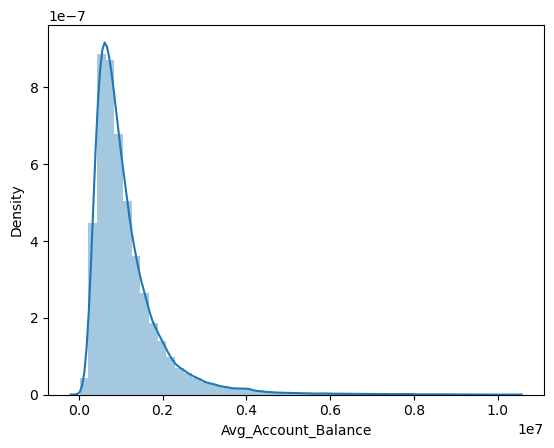

In [18]:
sns.distplot(train['Avg_Account_Balance'],kde=True)
plt.show()

**Based on above chart we can see that distribution of Avg Account balance is positively right skewed**

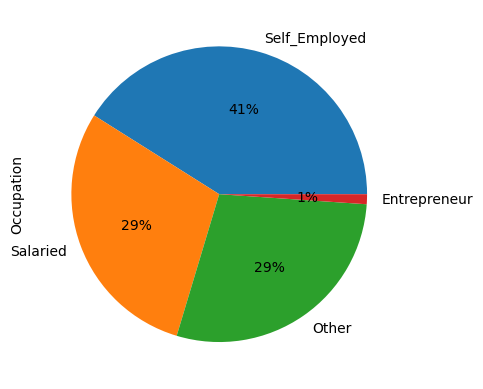

In [19]:
train['Occupation'].value_counts().plot(kind='pie',autopct='%.0f%%')
plt.show()

**As per above pie charts we can see that Self Employed have highest percentage**

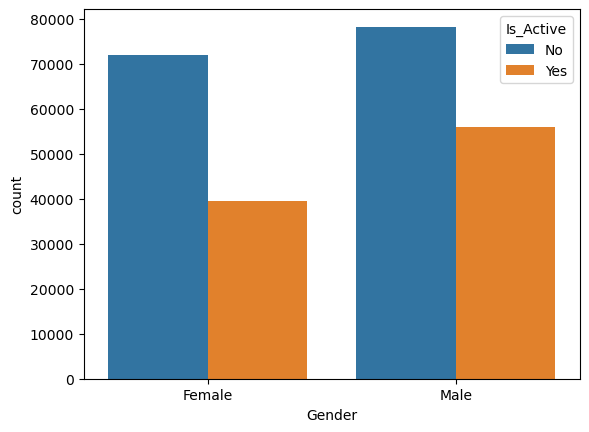

In [20]:
sns.countplot(train['Gender'],hue=train['Is_Active'])
plt.show()

**Based on above chart we can see that 'None Active Clients' are more than 'Active Clients'**

*Active Clients are those clients who is having exisiting Personal Loan, Credit Cards etc*

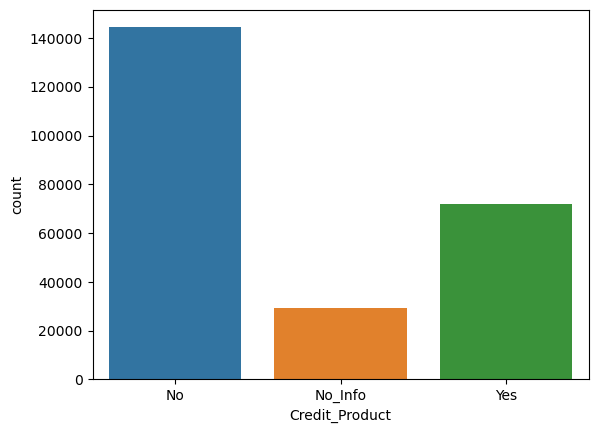

In [21]:
sns.countplot(train['Credit_Product'])
plt.show()

In [22]:
train['Credit_Product'].value_counts(normalize=True)*100

No         58.747380
Yes        29.318547
No_Info    11.934073
Name: Credit_Product, dtype: float64

**58.74% clients don't have Credit Products**,
**11.93% clients have Credit Products**,
**29.31% data don't have information**

**We are finding the clients who's average account balance is more than 5000000/- and don't have credit products**


In [23]:
train[(train['Avg_Account_Balance']>5000000) & (train['Credit_Product']=='No')]

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
113,Female,27,RG268,Salaried,X1,21,No,6278683,Yes,0
184,Female,74,RG268,Other,X3,33,No,5878049,Yes,0
461,Male,41,RG283,Other,X2,19,No,7880380,Yes,0
575,Female,26,RG268,Salaried,X1,15,No,5273143,No,0
626,Female,57,RG284,Self_Employed,X3,80,No,5752728,No,0
...,...,...,...,...,...,...,...,...,...,...
244461,Female,50,RG254,Self_Employed,X3,25,No,5541318,Yes,0
244481,Male,28,RG277,Self_Employed,X1,31,No,5680140,No,0
244971,Female,28,RG268,Salaried,X1,33,No,6247755,No,0
245365,Female,25,RG254,Other,X1,15,No,9279729,Yes,0


**No of Clients who's Age is Greater than 80**

In [24]:
train[train['Age']>80]['Age'].value_counts()

81    830
82    749
83    694
84    624
85    604
Name: Age, dtype: int64

# Categorical and Numerical Columns

In [25]:
num_col=train.select_dtypes(include=['int','float']).columns
num_col

Index(['Age', 'Vintage', 'Avg_Account_Balance', 'Is_Lead'], dtype='object')

In [26]:
cat_col=train.select_dtypes(include=['object']).columns
cat_col

Index(['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product',
       'Is_Active'],
      dtype='object')

# Converting Categorical columns into Label Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
le=LabelEncoder()

In [29]:
for i in cat_col:
    train[i]=le.fit_transform(train[i])

In [30]:
train.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,0,73,18,1,2,43,0,1045696,0,0
1,0,30,27,2,0,32,0,581988,0,0
2,0,56,18,3,2,26,0,1484315,1,0
3,1,34,20,2,0,19,0,470454,0,0
4,0,30,32,2,0,33,0,886787,0,0


In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   Gender               245725 non-null  int32
 1   Age                  245725 non-null  int64
 2   Region_Code          245725 non-null  int32
 3   Occupation           245725 non-null  int32
 4   Channel_Code         245725 non-null  int32
 5   Vintage              245725 non-null  int64
 6   Credit_Product       245725 non-null  int32
 7   Avg_Account_Balance  245725 non-null  int64
 8   Is_Active            245725 non-null  int32
 9   Is_Lead              245725 non-null  int64
dtypes: int32(6), int64(4)
memory usage: 13.1 MB


# Checking Correlation between variables

<AxesSubplot:>

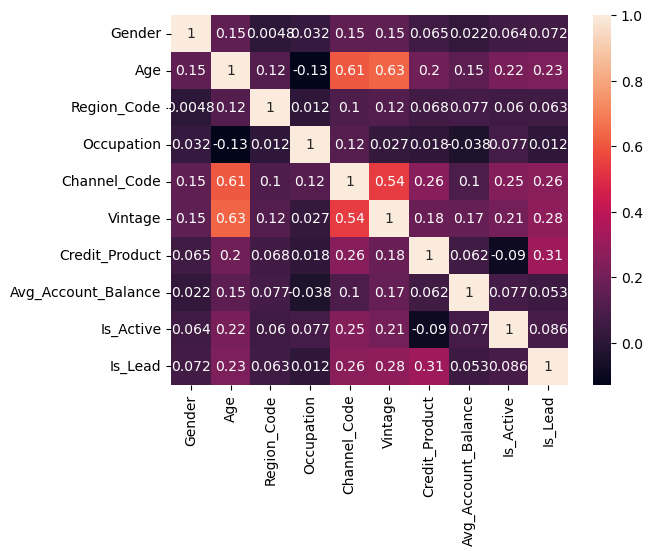

In [32]:
sns.heatmap(train.corr(),annot=True)

**Based on above information we can say that features like 'Age','Vintage','Credit Product' are positively correlated with target variable**

# Defining Independent Variable and Dependent Variable

In [33]:
X=train.iloc[:,:-1]
y=train.iloc[:,-1]

In [34]:
X.shape

(245725, 9)

In [35]:
y.shape

(245725,)

# Convert Data into Train Test Split

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=123)

In [38]:
X_train.shape,y_train.shape

((196580, 9), (196580,))

In [39]:
X_test.shape,y_test.shape

((49145, 9), (49145,))

# Scaling

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
ss=StandardScaler()

In [42]:
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

# Model Building & Evaluation 

# Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
lr=LogisticRegression()

In [45]:
lr.fit(X_train,y_train)

LogisticRegression()

In [46]:
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)

In [47]:
from sklearn.metrics import classification_report

In [48]:
print("Train Data")
print(classification_report(y_train,y_train_pred))

print('Test Data')
print(classification_report(y_test,y_test_pred))

Train Data
              precision    recall  f1-score   support

           0       0.79      0.93      0.86    149941
           1       0.50      0.21      0.30     46639

    accuracy                           0.76    196580
   macro avg       0.65      0.57      0.58    196580
weighted avg       0.72      0.76      0.72    196580

Test Data
              precision    recall  f1-score   support

           0       0.79      0.93      0.86     37496
           1       0.51      0.22      0.31     11649

    accuracy                           0.76     49145
   macro avg       0.65      0.58      0.58     49145
weighted avg       0.73      0.76      0.73     49145



# Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
dt=DecisionTreeClassifier()

In [51]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [52]:
y_train_pred=dt.predict(X_train)
y_test_pred=dt.predict(X_test)

In [53]:
print("Train Data")
print(classification_report(y_train,y_train_pred))

print('Test Data')
print(classification_report(y_test,y_test_pred))

Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    149941
           1       1.00      1.00      1.00     46639

    accuracy                           1.00    196580
   macro avg       1.00      1.00      1.00    196580
weighted avg       1.00      1.00      1.00    196580

Test Data
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     37496
           1       0.55      0.56      0.55     11649

    accuracy                           0.78     49145
   macro avg       0.70      0.71      0.71     49145
weighted avg       0.79      0.78      0.79     49145



#Decision Tree main drawback is always overfitted.
Decision Tree second drawback is, if one change in data will lead to large change in data tree structure.
#To overcome this issuse we will use hyperparameter tuning to find the best result.

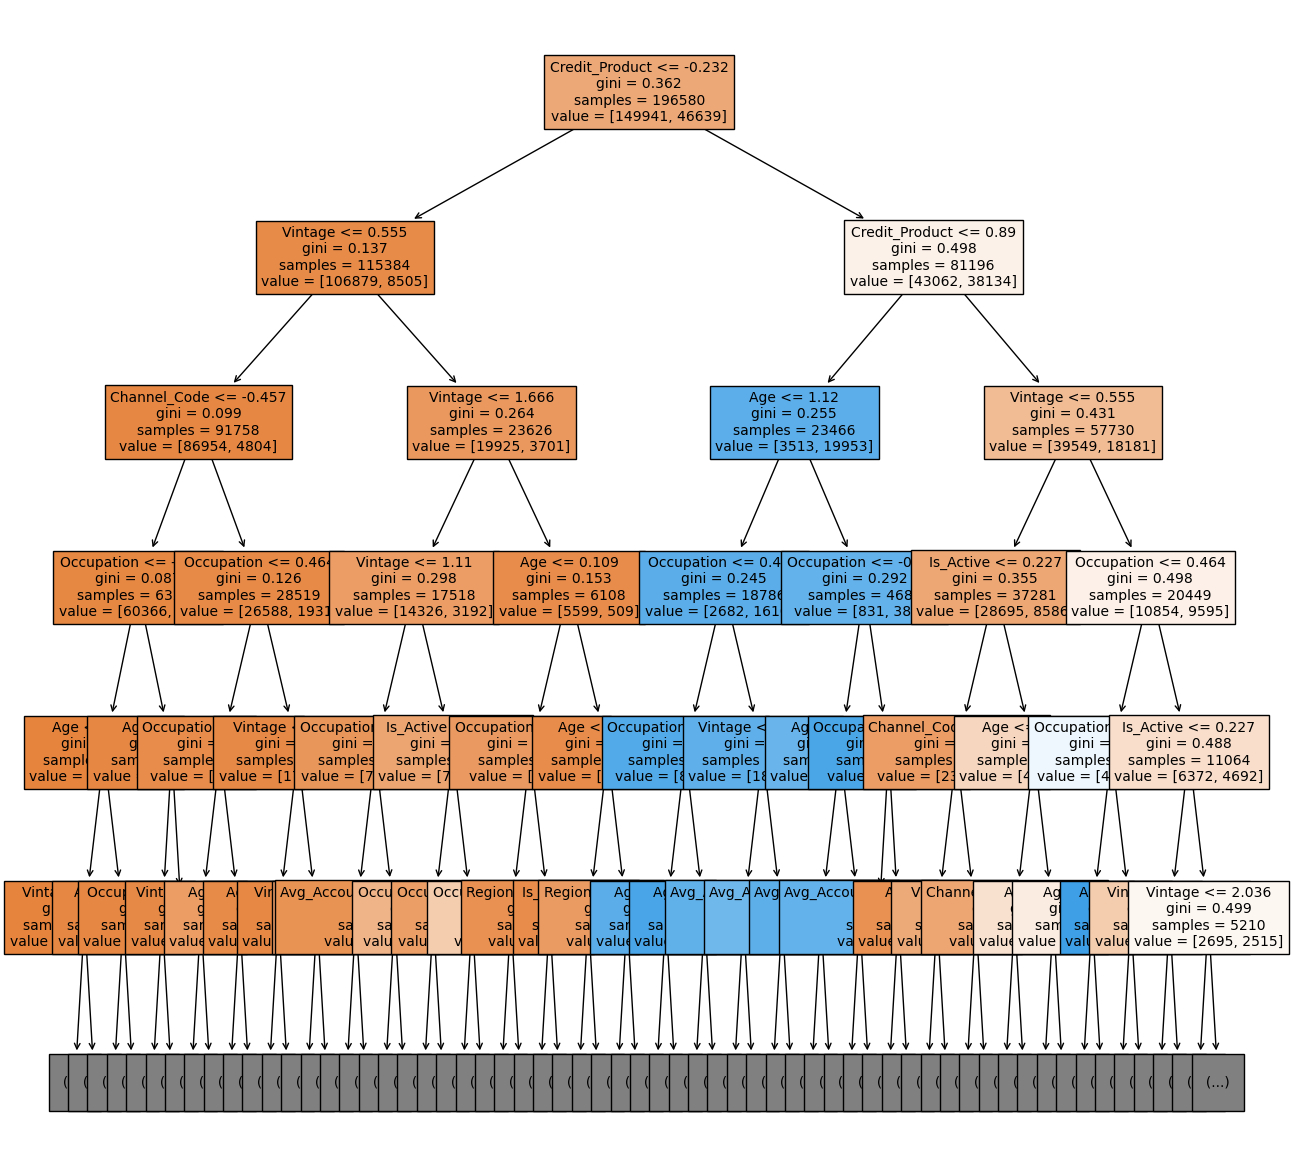

In [54]:
from sklearn import tree
fig,ax=plt.subplots(figsize=(15,15))
chart=tree.plot_tree(dt,max_depth=5,fontsize=10,feature_names=X.columns,filled=True)

In [55]:
imp_features=pd.DataFrame({
    'features_names':X.columns,
    'Importance':dt.feature_importances_
})

fea=imp_features.sort_values(by='Importance',ascending=False)

#Importance Features


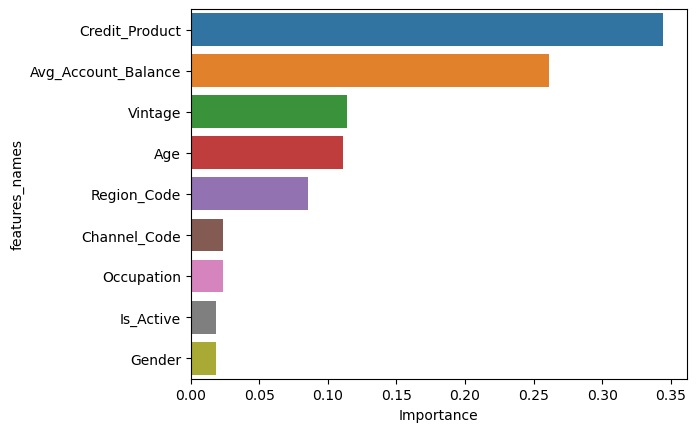

In [56]:
sns.barplot(data=fea,x='Importance',y='features_names')
plt.show()

#Decision tree with Hyperparameter tuning

In [193]:
param_grid={
    'max_depth':[5,10,15,20,25,30],
    'criterion':['entropy','gini'],
    'class_weight':[None,'balanced'],
    'min_samples_split':[3,6,9,12,15]
}

In [194]:
from sklearn.model_selection import GridSearchCV

In [195]:
grid=GridSearchCV(dt,param_grid=param_grid,scoring='f1_macro',cv=3,n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['entropy', 'gini'],
                         'max_depth': [5, 10, 15, 20, 25, 30],
                         'min_samples_split': [3, 6, 9, 12, 15]},
             scoring='f1_macro')

In [199]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=3)

In [200]:
grid.best_score_

0.775345337424389

In [201]:
grid.best_params_

{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_split': 3}

In [202]:
y_train_grid=grid.predict(X_train)
y_test_grid=grid.predict(X_test)

In [203]:
from sklearn.metrics import classification_report
print('Train Data')
print(classification_report(y_train,y_train_grid))

print('Test Data')
print(classification_report(y_test,y_test_grid))

Train Data
              precision    recall  f1-score   support

           0       0.88      0.95      0.91    149941
           1       0.78      0.58      0.66     46639

    accuracy                           0.86    196580
   macro avg       0.83      0.76      0.79    196580
weighted avg       0.86      0.86      0.85    196580

Test Data
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     37496
           1       0.77      0.57      0.65     11649

    accuracy                           0.86     49145
   macro avg       0.82      0.76      0.78     49145
weighted avg       0.85      0.86      0.85     49145



# Random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rfc=RandomForestClassifier()

In [59]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [60]:
y_train_pred=rfc.predict(X_train)
y_test_pred=rfc.predict(X_test)

In [61]:
from sklearn.metrics import classification_report,accuracy_score
print('Train Data')
print(classification_report(y_train,y_train_pred))

print('Test Data')
print(classification_report(y_test,y_test_pred))

Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    149941
           1       1.00      1.00      1.00     46639

    accuracy                           1.00    196580
   macro avg       1.00      1.00      1.00    196580
weighted avg       1.00      1.00      1.00    196580

Test Data
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     37496
           1       0.75      0.57      0.65     11649

    accuracy                           0.85     49145
   macro avg       0.81      0.76      0.78     49145
weighted avg       0.85      0.85      0.85     49145



# Using Stratified K Fold Cross Validation

In [209]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

skf=StratifiedKFold(n_splits=10,random_state=None)

f1_macro=cross_val_score(rfc,X,y,scoring='f1_macro',cv=skf)
print(f1_macro)

[0.77948656 0.77828418 0.77667198 0.78050269 0.77461832 0.77835973
 0.77635279 0.77775024 0.78440037 0.78034231]


In [210]:
f1_macro.mean()

0.7786769153856699

# AdaBoostClassifier

In [62]:
from sklearn.ensemble import AdaBoostClassifier

In [63]:
abc=AdaBoostClassifier()

In [64]:
abc.fit(X_train,y_train)

AdaBoostClassifier()

In [65]:
y_train_pred=abc.predict(X_train)
y_test_pred=abc.predict(X_test)

In [66]:
print("Train Data")
print(classification_report(y_train,y_train_pred))

print('Test Data')
print(classification_report(y_test,y_test_pred))

Train Data
              precision    recall  f1-score   support

           0       0.86      0.96      0.91    149941
           1       0.82      0.50      0.62     46639

    accuracy                           0.86    196580
   macro avg       0.84      0.73      0.77    196580
weighted avg       0.85      0.86      0.84    196580

Test Data
              precision    recall  f1-score   support

           0       0.86      0.97      0.91     37496
           1       0.82      0.51      0.63     11649

    accuracy                           0.86     49145
   macro avg       0.84      0.74      0.77     49145
weighted avg       0.85      0.86      0.84     49145



**Applying Grid Search CV Hyper Parameter tuning**

In [216]:
from sklearn.model_selection import GridSearchCV

In [217]:
param_grid={
    'learning_rate':[0.1,0.01,1,2,3],
    'n_estimators':[50,100,150]
}

In [218]:
grid1=GridSearchCV(abc,param_grid=param_grid,scoring='f1_macro',cv=3,n_jobs=-1)
grid1.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 1, 2, 3],
                         'n_estimators': [50, 100, 150]},
             scoring='f1_macro')

In [219]:
grid1.best_params_

{'learning_rate': 1, 'n_estimators': 150}

In [220]:
grid1.best_estimator_

AdaBoostClassifier(learning_rate=1, n_estimators=150)

In [221]:
grid1.best_score_

0.7676266582585098

In [222]:
y_train_grid1=grid1.predict(X_train)
y_test_grid1=grid1.predict(X_test)

In [223]:
from sklearn.metrics import classification_report
print('Train Data')
print(classification_report(y_train,y_train_grid1))

print('Test Data')
print(classification_report(y_test,y_test_grid1))

Train Data
              precision    recall  f1-score   support

           0       0.86      0.96      0.91    149941
           1       0.81      0.51      0.63     46639

    accuracy                           0.86    196580
   macro avg       0.84      0.74      0.77    196580
weighted avg       0.85      0.86      0.84    196580

Test Data
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     37496
           1       0.82      0.51      0.63     11649

    accuracy                           0.86     49145
   macro avg       0.84      0.74      0.77     49145
weighted avg       0.85      0.86      0.84     49145



# Gradient Boosting Classifier

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

In [68]:
gbc=GradientBoostingClassifier()

In [69]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [70]:
y_train_pred=gbc.predict(X_train)
y_test_pred=gbc.predict(X_test)

In [71]:
print("Train Data")
print(classification_report(y_train,y_train_pred))

print('Test Data')
print(classification_report(y_test,y_test_pred))

Train Data
              precision    recall  f1-score   support

           0       0.87      0.96      0.91    149941
           1       0.81      0.54      0.65     46639

    accuracy                           0.86    196580
   macro avg       0.84      0.75      0.78    196580
weighted avg       0.86      0.86      0.85    196580

Test Data
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     37496
           1       0.81      0.54      0.65     11649

    accuracy                           0.86     49145
   macro avg       0.84      0.75      0.78     49145
weighted avg       0.86      0.86      0.85     49145



**Applying Grid Search CV Hyper Parameter tuning**

In [229]:
param_grid1={
    'n_estimators':range(20,81,10),
    'learning_rate':[0.1,1]
}

In [230]:
from sklearn.model_selection import GridSearchCV

In [231]:
grid2=GridSearchCV(gbc,param_grid=param_grid1,scoring='f1_macro',cv=5,n_jobs=-1)

In [232]:
grid2.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 1],
                         'n_estimators': range(20, 81, 10)},
             scoring='f1_macro')

In [233]:
y_train_grid2=grid2.predict(X_train)
y_test_grid2=grid2.predict(X_test)

In [234]:
grid2.best_params_

{'learning_rate': 1, 'n_estimators': 50}

In [235]:
grid2.best_score_

0.782306937336721

In [236]:
grid2.best_estimator_

GradientBoostingClassifier(learning_rate=1, n_estimators=50)

In [237]:
print("Train Data")
print(classification_report(y_train,y_train_grid2))

print('Test Data')
print(classification_report(y_test,y_test_grid2))

Train Data
              precision    recall  f1-score   support

           0       0.87      0.96      0.91    149941
           1       0.80      0.56      0.66     46639

    accuracy                           0.86    196580
   macro avg       0.84      0.76      0.78    196580
weighted avg       0.86      0.86      0.85    196580

Test Data
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     37496
           1       0.80      0.56      0.66     11649

    accuracy                           0.86     49145
   macro avg       0.84      0.76      0.78     49145
weighted avg       0.86      0.86      0.85     49145



# Support Vector Machine

In [238]:
#from sklearn.svm import SVC

In [239]:
#model=SVC()

In [240]:
#model.fit(X_train,y_train)

In [241]:
#y_train_predition=model.predict(X_train)
#y_test_predition=model.predict(X_test)

In [242]:
#print("Train Data")
#print(classification_report(y_train,y_train_predition))

#print('Test Data')
#print(classification_report(y_test,y_test_predition))

# Oversampling Target Variable 

**Checking target variable frequency**

In [72]:
train['Is_Lead'].value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

In [73]:
train_majority=train[train['Is_Lead']==0]
train_minority=train[train['Is_Lead']==1]

In [74]:
from sklearn.utils import resample
# Upsampling Minority Class
train_upsample_minority=resample(train_minority,replace=True,n_samples=187437,random_state=0)

In [75]:
train_upsampled=pd.concat([train_majority,train_upsample_minority])

In [76]:
train_upsampled.shape

(374874, 10)

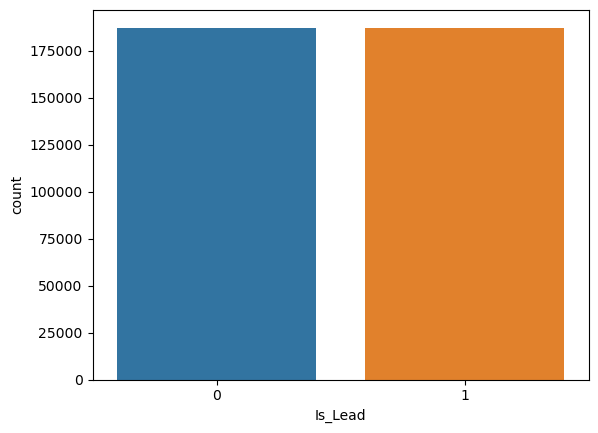

In [77]:
sns.countplot(x=train_upsampled['Is_Lead'])
plt.show()

In [78]:
train_upsampled.value_counts()

Gender  Age  Region_Code  Occupation  Channel_Code  Vintage  Credit_Product  Avg_Account_Balance  Is_Active  Is_Lead
1       49   33           3           1             63       2               1436789              0          1          12
        50   27           1           2             105      2               1170866              0          1          12
0       30   24           2           0             27       2               988549               0          1          12
1       28   4            2           0             15       2               2091704              0          1          12
0       65   13           1           2             74       1               850573               0          1          12
                                                                                                                        ..
        53   18           3           2             103      2               4022185              1          0           1
                      

# Defining X and Y variable 

In [79]:
X1=train_upsampled.drop(['Is_Lead'],axis=1)
y1=train_upsampled['Is_Lead']

In [80]:
X1.shape

(374874, 9)

In [81]:
y1.shape

(374874,)

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.30,random_state=141)

In [84]:
X1_train.shape,y1_train.shape

((262411, 9), (262411,))

In [85]:
X1_test.shape,y1_test.shape

((112463, 9), (112463,))

# Scaling

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
ss=StandardScaler()

In [88]:
X1_train=ss.fit_transform(X1_train)
X1_test=ss.fit_transform(X1_test)

# Model Building & Evaluation 

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC


In [90]:
clf1=LogisticRegression()
clf2=DecisionTreeClassifier()
clf3=RandomForestClassifier()
clf4=AdaBoostClassifier()
cl5=GradientBoostingClassifier()
clf6=SVC()



In [91]:
from sklearn.metrics import classification_report
def model_building(model):
    model.fit(X1_train,y1_train)
    ytrain_model_pred=model.predict(X1_train)
    ytest_model_pred=model.predict(X1_test)
    print("Train Data")
    print(classification_report(y1_train,ytrain_model_pred))
    print("Test Data")
    print(classification_report(y1_test,ytest_model_pred))

In [92]:
print("Logisitic Regression")
model_building(clf1)

Logisitic Regression
Train Data
              precision    recall  f1-score   support

           0       0.72      0.69      0.71    131488
           1       0.70      0.73      0.72    130923

    accuracy                           0.71    262411
   macro avg       0.71      0.71      0.71    262411
weighted avg       0.71      0.71      0.71    262411

Test Data
              precision    recall  f1-score   support

           0       0.72      0.69      0.71     55949
           1       0.71      0.73      0.72     56514

    accuracy                           0.71    112463
   macro avg       0.71      0.71      0.71    112463
weighted avg       0.71      0.71      0.71    112463



In [93]:
print("Decision Tree")
model_building(clf2)

Decision Tree
Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    131488
           1       1.00      1.00      1.00    130923

    accuracy                           1.00    262411
   macro avg       1.00      1.00      1.00    262411
weighted avg       1.00      1.00      1.00    262411

Test Data
              precision    recall  f1-score   support

           0       0.88      0.83      0.86     55949
           1       0.84      0.89      0.87     56514

    accuracy                           0.86    112463
   macro avg       0.86      0.86      0.86    112463
weighted avg       0.86      0.86      0.86    112463



In [265]:
print("Random Forest Classifier")
model_building(clf3)

Random Forest Classifier
Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    131488
           1       1.00      1.00      1.00    130923

    accuracy                           1.00    262411
   macro avg       1.00      1.00      1.00    262411
weighted avg       1.00      1.00      1.00    262411

Test Data
              precision    recall  f1-score   support

           0       0.95      0.89      0.92     55949
           1       0.90      0.96      0.93     56514

    accuracy                           0.93    112463
   macro avg       0.93      0.92      0.92    112463
weighted avg       0.93      0.93      0.92    112463



In [266]:
print("Ada Boost Classifier")
model_building(clf4)

Ada Boost Classifier
Train Data
              precision    recall  f1-score   support

           0       0.78      0.82      0.80    131488
           1       0.81      0.77      0.79    130923

    accuracy                           0.80    262411
   macro avg       0.80      0.80      0.80    262411
weighted avg       0.80      0.80      0.80    262411

Test Data
              precision    recall  f1-score   support

           0       0.78      0.82      0.80     55949
           1       0.81      0.77      0.79     56514

    accuracy                           0.79    112463
   macro avg       0.80      0.79      0.79    112463
weighted avg       0.80      0.79      0.79    112463



In [267]:
print("Gradient Boosting Classifier")
model_building(cl5)

Gradient Boosting Classifier
Train Data
              precision    recall  f1-score   support

           0       0.79      0.84      0.81    131488
           1       0.82      0.78      0.80    130923

    accuracy                           0.81    262411
   macro avg       0.81      0.81      0.81    262411
weighted avg       0.81      0.81      0.81    262411

Test Data
              precision    recall  f1-score   support

           0       0.78      0.84      0.81     55949
           1       0.83      0.77      0.80     56514

    accuracy                           0.80    112463
   macro avg       0.81      0.80      0.80    112463
weighted avg       0.81      0.80      0.80    112463



In [268]:
#print('Support Vector Machine')
#model_building(clf6)

**We will use Hyperparameter Tuning to check best estimator score for Logistic Regression**

In [94]:
param={
   'C':[0.0001,0.001,0.01,0.1,1,10,100,1000],
    'class_weight':[None,'balanced']
}

In [95]:
from sklearn.model_selection import GridSearchCV

In [97]:
grid4=GridSearchCV(clf1,param_grid=param,scoring='f1_macro',cv=3,n_jobs=-1)

In [98]:
grid4.fit(X1_train,y1_train)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'class_weight': [None, 'balanced']},
             scoring='f1_macro')

In [99]:
grid4.best_score_

0.7199601750513774

In [100]:
y_balanced_train=grid4.predict(X1_train)
y_balanced_test=grid4.predict(X1_test)


In [101]:
from sklearn.metrics import classification_report
print("Train Data")
print(classification_report(y1_train,y_balanced_train))

print('Test Data')
print(classification_report(y1_test,y_balanced_test))

Train Data
              precision    recall  f1-score   support

           0       0.73      0.70      0.71    131488
           1       0.71      0.74      0.72    130923

    accuracy                           0.72    262411
   macro avg       0.72      0.72      0.72    262411
weighted avg       0.72      0.72      0.72    262411

Test Data
              precision    recall  f1-score   support

           0       0.73      0.70      0.71     55949
           1       0.71      0.74      0.73     56514

    accuracy                           0.72    112463
   macro avg       0.72      0.72      0.72    112463
weighted avg       0.72      0.72      0.72    112463



# Looking above all algorithm prediction Gradient Boosting Classifier score highest of 80% accuracy then others.